In [9]:
from prc import process_data

In [10]:
df1 = process_data()
df1

/home/asus/stuDYING/IT/DataScience/project/get_data/get_data.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM all_leagues',conn)


,player_id,Name,Squad,Min,Pos,Ast,Att,Att1,Att2,Att3,AttPen,BlockSh,Blocks,CPA,Carries,CarriesFDOUBLEhird,Clr,Cmp,Cmp1,Cmp2,Cmp3,CrdR,CrdY,CrsPA,DOUBLE,DefGoal,DefPen,DefShot,Dis,DribContest,DribGoal,DribShot,DribTackled,Err,Fld,FldGoal,GCA,Gls,KP,Live,Megs,Mis,NumPl,PK,PKatt,PPA,Pass,PassAtt,PassDeadGoal,PassDeadShot,PassF hird,PassLiveGoal,PassLiveShot,PassPrgDist,PassProg,PassTotDist,Past,Press,PressAtt3rd,PressDef3rd,PressMid3rd,PrgDist,ProgCarries,ProgPassRec,Rec,SCA,Sh,ShGoal,ShLSh,ShSv,SoT,Succ,SuccPress,TacklesAtt3rd,TacklesDef3rd,TacklesMid3rd,Targ,Tkl,TklDOUBLE,TklW,TotDist,TouchAtt3rd,TouchDef3rd,TouchMid3rd,Touches,npxG,xA,xG,Cmp%,Cmp%.1,Cmp%.2,Cmp%.3,DribTackled%,SuccPress%,Succ%,Rec%
0,e6adb385a0d7c823cf886437eeb23046,Aaron Connolly,Brighton,791.0,"[FW, LW, WB]",0.113780,1.137800,0.0,0.0,0.0,4.323641,0.113780,1.024020,0.455120,14.108723,0.0,0.113780,8.988622,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.706700,0.568900,0.000000,0.341340,0.113780,0.000000,0.227560,0.000000,0.113780,0.227560,0.568900,21.731985,0.000000,3.299621,0.0,0.000000,0.000000,0.113780,0.910240,11.491783,0.000000,0.000000,0.0,0.113780,0.796460,18.773704,0.341340,130.505689,0.455120,14.108723,6.713021,0.796460,6.599241,44.032870,1.934260,7.509482,16.270544,1.365360,2.616941,0.000000,0.000000,0.000000,0.910240,0.910240,4.551201,0.113780,0.227560,0.455120,40.619469,0.796460,0.0,0.568900,74.525917,13.198483,1.592920,9.557522,22.869785,0.409608,0.011378,0.409608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,b0050f8465a014f45bfb9db9868fd9d0,Aaron Cresswell,West Ham,3170.0,"[LB, CB]",0.227129,0.425868,0.0,0.0,0.0,0.511041,0.397476,1.362776,0.085174,35.943218,0.0,2.810726,43.750789,0.0,0.0,0.0,0.000000,0.085174,0.482650,0.0,0.000000,0.0,0.000000,0.255521,0.965300,0.000000,0.028391,0.397476,0.000000,0.056782,0.028391,0.397476,0.000000,1.703470,52.835962,0.056782,0.198738,0.0,0.000000,0.000000,0.681388,0.965300,58.485804,0.170347,1.164038,0.0,0.141956,1.362776,419.167192,3.406940,876.832808,0.567823,6.529968,0.511041,3.463722,2.555205,74.299685,2.753943,0.851735,37.419558,2.725552,0.539432,0.056782,0.113565,0.000000,0.113565,0.170347,1.902208,0.056782,0.425868,0.397476,38.782334,0.880126,0.0,0.369085,152.943218,16.864353,21.776025,29.895899,65.498423,0.028391,0.161830,0.028391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ecb6284980af030d92a131f88c2ec121,Aaron Hickey,Bologna,758.0,"[LB, WB, FW]",0.000000,1.781003,0.0,0.0,0.0,1.187335,0.237467,2.018470,0.237467,38.232190,0.0,1.781003,40.250660,0.0,0.0,0.0,0.118734,0.356201,0.118734,0.0,0.000000,0.0,0.000000,1.543536,2.018470,0.000000,0.000000,0.712401,0.000000,0.000000,0.000000,0.118734,0.000000,0.474934,50.699208,0.000000,1.187335,0.0,0.000000,0.000000,0.474934,1.781003,47.968338,0.000000,0.118734,0.0,0.118734,0.712401,234.736148,2.849604,724.274406,1.306069,11.160950,1.781003,5.343008,4.036939,113.034301,4.036939,1.899736,33.245383,0.831135,0.356201,0.000000,0.000000,0.000000,0.118734,0.949868,3.918206,0.118734,1.187335,0.237467,35.738786,1.543536,0.0,0.712401,229.274406,16.503958,18.997361,29.327177,59.960422,0.011873,0.035620,0.011873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,c3a9b84dd52f619a84b7b5c6f8bd464c,Aaron Leya Iseka,Metz,1008.0,"[FW, AM]",0.000000,2.053571,0.0,0.0,0.0,3.125000,0.267857,0.535714,0.892857,18.303571,0.0,0.357143,13.482143,0.0,0.0,0.0,0.000000,0.357143,0.000000,0.0,0.000000,0.0,0.000000,1.785714,0.892857,0.089286,0.267857,0.267857,0.000000,0.357143,0.000000,0.089286,0.357143,1.071429,27.500000,0.000000,2.857143,0.0,0.178571,0.267857,0.267857,0.267857,17.767857,0.000000,0.000000,0.0,0.000000,1.250000,30.357143,0.803571,202.589286,0.625000,10.803571,5.446429,0.357143,5.000000,38.392857,2.678571,5.535714,22.500000,1.875000,1.607143,0.000000,0.000000,0.000000,0.535714,1.250000,2.321429,0.267857,0.267857,0.267857,48.482143,0.803571,0.0,0.446429,75.803571,11.517857,2.946429,16.071429,28.482143,0.214286,0.062500,0.428571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,581556aba0cd16b6008da842b7e02064,Aaron Ra

In [11]:
import pandas as pd

In [12]:
df2 = pd.read_csv('all_processed.csv')

In [13]:
df2

,player_id,Name,Squad,Min,Pos,#Pl,Ast,Att,Att.1,Att.2,Att.3,AttPen,BlockSh,Blocks,CPA,Carries,CarriesFinThird,Clr,Cmp,Cmp.1,Cmp.2,Cmp.3,CrdR,CrdY,CrsPA,Def Pen,DefGoal,DefShot,Dis,DribContest,DribGoal,DribShot,DribTackled,Err,Fld,FldGoal,GCA,Gls,Int,KP,Live,Megs,Mis,PK,PKatt,PPA,Pass,PassAtt,PassDeadGoal,PassDeadShot,PassFinThird,PassLiveGoal,PassLiveShot,PassPrgDist,PassProg,PassTotDist,Past,Press,PressAtt3rd,PressDef3rd,PressMid3rd,PrgDist,ProgCarries,ProgPassRec,Rec,SCA,Sh,ShGoal,ShLSh,ShSv,SoT,Succ,SuccPress,TacklesAtt3rd,TacklesDef3rd,TacklesMid3rd,Targ,Tkl,Tkl+Int,TklW,TotDist,TouchAtt3rd,TouchDef3rd,TouchMid3rd,Touches,npxG,xA,xG,Cmp%,Cmp%.1,Cmp%.2,Cmp%.3,DribTackled%,SuccPress%,Succ%,Rec%
0,e6adb385a0d7c823cf886437eeb23046,Aaron Connolly,Brighton,791.0,"['FW', 'LW', 'WB']",0.910240,0.113780,1.137800,6.371681,3.413401,0.568900,4.323641,0.113780,1.024020,0.455120,14.108723,0.910240,0.113780,8.988622,5.120101,2.958281,0.455120,0.000000,0.000000,0.000000,0.113780,0.000000,0.000000,1.706700,0.568900,0.000000,0.341340,0.113780,0.000000,0.227560,0.000000,0.113780,0.227560,0.000000,0.568900,21.731985,0.000000,3.299621,0.000000,0.000000,0.113780,0.910240,11.491783,0.000000,0.000000,0.227560,0.113780,0.796460,18.773704,0.341340,130.505689,0.455120,14.108723,6.713021,0.796460,6.599241,44.032870,1.934260,7.509482,16.270544,1.365360,2.616941,0.000000,0.000000,0.000000,0.910240,0.910240,4.551201,0.113780,0.227560,0.455120,40.619469,0.796460,0.796460,0.568900,74.525917,13.198483,1.592920,9.557522,22.869785,0.409608,0.011378,0.409608,78.088235,72.588235,63.335294,23.529412,2.941176,27.982353,35.294118,43.394118
1,b0050f8465a014f45bfb9db9868fd9d0,Aaron Cresswell,West Ham,3170.0,"['LB', 'CB']",0.227129,0.227129,0.425868,20.867508,20.895899,14.706625,0.511041,0.397476,1.362776,0.085174,35.943218,1.135647,2.810726,43.750789,18.596215,17.488959,7.154574,0.000000,0.085174,0.482650,5.167192,0.000000,0.000000,0.255521,0.965300,0.000000,0.028391,0.397476,0.000000,0.056782,0.028391,0.397476,0.000000,1.022082,1.703470,52.835962,0.056782,0.198738,0.000000,0.000000,0.681388,0.965300,58.485804,0.170347,1.164038,4.230284,0.141956,1.362776,419.167192,3.406940,876.832808,0.567823,6.529968,0.511041,3.463722,2.555205,74.299685,2.753943,0.851735,37.419558,2.725552,0.539432,0.056782,0.113565,0.000000,0.113565,0.170347,1.902208,0.056782,0.425868,0.397476,38.782334,0.880126,1.902208,0.369085,152.943218,16.864353,21.776025,29.895899,65.498423,0.028391,0.161830,0.028391,74.041667,88.816667,82.544444,48.175000,25.694444,29.308333,13.888889,96.108333
2,ecb6284980af030d92a131f88c2ec121,Aaron Hickey,Bologna,758.0,"['LB', 'WB', 'FW']",1.187335,0.000000,1.781003,18.641161,22.203166,5.699208,1.187335,0.237467,2.018470,0.237467,38.232190,2.137203,1.781003,40.250660,16.978892,18.997361,3.799472,0.118734,0.356201,0.118734,3.562005,0.000000,0.000000,1.543536,2.018470,0.000000,0.000000,0.712401,0.000000,0.000000,0.000000,0.118734,0.000000,1.424802,0.474934,50.699208,0.000000,1.187335,0.000000,0.000000,0.474934,1.781003,47.968338,0.000000,0.118734,2.849604,0.118734,0.712401,234.736148,2.849604,724.274406,1.306069,11.160950,1.781003,5.343008,4.036939,113.034301,4.036939,1.899736,33.245383,0.831135,0.356201,0.000000,0.000000,0.000000,0.118734,0.949868,3.918206,0.118734,1.187335,0.237467,35.738786,1.543536,2.968338,0.712401,229.274406,16.503958,18.997361,29.327177,59.960422,0.011873,0.035620,0.011873,81.509091,83.245455,84.972727,52.727273,24.236364,35.490909,43.936364,89.736364
3,c3a9b84dd52f619a84b7b5c6f8bd464c,Aaron Leya Iseka,Metz,1008.0,"['FW', 'AM']",1.428571,0.000000,2.053571,9.910714,5.089286,1.517857,3.125000,0.267857,0.535714,0.892857,18.303571,1.071429,0.357143,13.482143,8.125000,3.750000,1.071429,0.000000,0.357143,0.000000,0.982143,0.000000,0.000000,1.785714,0.892857,0.089286,0.267857,0.267857,0.000000,0.357143,0.000000,0.089286,0.357143,0.178571,1.071429,27.500000,0.000000,2.857143,0.178571,0.267857,0.267857,0.267857,17.767857,0.000000,0.000000,0.892857,0.000000

In [16]:
#get all the columns names from df1
df1.columns

Index(['player_id', 'Name', 'Squad', 'Min', 'Pos', 'Ast', 'Att', 'Att1',
       'Att2', 'Att3', 'AttPen', 'BlockSh', 'Blocks', 'CPA', 'Carries',
       'CarriesFDOUBLEhird', 'Clr', 'Cmp', 'Cmp1', 'Cmp2', 'Cmp3', 'CrdR',
       'CrdY', 'CrsPA', 'DOUBLE', 'DefGoal', 'DefPen', 'DefShot', 'Dis',
       'DribContest', 'DribGoal', 'DribShot', 'DribTackled', 'Err', 'Fld',
       'FldGoal', 'GCA', 'Gls', 'KP', 'Live', 'Megs', 'Mis', 'NumPl', 'PK',
       'PKatt', 'PPA', 'Pass', 'PassAtt', 'PassDeadGoal', 'PassDeadShot',
       'PassF hird', 'PassLiveGoal', 'PassLiveShot', 'PassPrgDist', 'PassProg',
       'PassTotDist', 'Past', 'Press', 'PressAtt3rd', 'PressDef3rd',
       'PressMid3rd', 'PrgDist', 'ProgCarries', 'ProgPassRec', 'Rec', 'SCA',
       'Sh', 'ShGoal', 'ShLSh', 'ShSv', 'SoT', 'Succ', 'SuccPress',
       'TacklesAtt3rd', 'TacklesDef3rd', 'TacklesMid3rd', 'Targ', 'Tkl',
       'TklDOUBLE', 'TklW', 'TotDist', 'TouchAtt3rd', 'TouchDef3rd',
       'TouchMid3rd', 'Touches', 'npxG', 'xA',

In [17]:
#get all the columns names from df2
df2.columns

Index(['player_id', 'Name', 'Squad', 'Min', 'Pos', '#Pl', 'Ast', 'Att',
       'Att.1', 'Att.2', 'Att.3', 'AttPen', 'BlockSh', 'Blocks', 'CPA',
       'Carries', 'CarriesFinThird', 'Clr', 'Cmp', 'Cmp.1', 'Cmp.2', 'Cmp.3',
       'CrdR', 'CrdY', 'CrsPA', 'Def Pen', 'DefGoal', 'DefShot', 'Dis',
       'DribContest', 'DribGoal', 'DribShot', 'DribTackled', 'Err', 'Fld',
       'FldGoal', 'GCA', 'Gls', 'Int', 'KP', 'Live', 'Megs', 'Mis', 'PK',
       'PKatt', 'PPA', 'Pass', 'PassAtt', 'PassDeadGoal', 'PassDeadShot',
       'PassFinThird', 'PassLiveGoal', 'PassLiveShot', 'PassPrgDist',
       'PassProg', 'PassTotDist', 'Past', 'Press', 'PressAtt3rd',
       'PressDef3rd', 'PressMid3rd', 'PrgDist', 'ProgCarries', 'ProgPassRec',
       'Rec', 'SCA', 'Sh', 'ShGoal', 'ShLSh', 'ShSv', 'SoT', 'Succ',
       'SuccPress', 'TacklesAtt3rd', 'TacklesDef3rd', 'TacklesMid3rd', 'Targ',
       'Tkl', 'Tkl+Int', 'TklW', 'TotDist', 'TouchAtt3rd', 'TouchDef3rd',
       'TouchMid3rd', 'Touches', 'npxG', 'xA', 

In [28]:
#get the value of Pos column of Harry Kane from df2
df2.loc[df2['Name'] == 'Harry Kane', 'Pos'].values

array(["['FW']"], dtype=object)

In [29]:
#get the value of Pos column of Harry Kane from df1
df1.loc[df1['Name'] == 'Harry Kane', 'Pos'].values

array([list(['FW'])], dtype=object)

In [25]:
(df1.loc[df1['Name'] == 'Harry Kane', 'Pos'].values == df2.loc[df2['Name'] == 'Harry Kane', 'Pos'].values)[0]

False

In [39]:
from utils import load_data, get_similar_players_cosine, get_similar_players_knn, compare_players

2023-12-10 05:25:19.400 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [40]:
df, scaled_df, similarity_df = load_data()

2023-12-10 05:26:24.785 
  command:

    streamlit run /home/asus/anaconda3/envs/datamining/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-12-10 05:26:24.786 No runtime found, using MemoryCacheStorageManager
/home/asus/stuDYING/IT/DataScience/project/get_data/get_data.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM all_leagues',conn)


In [42]:
similar_players_cosine = get_similar_players_cosine(scaled_df, similarity_df, player_name='Harry Kane', top_n=10)

In [44]:
similar_players_cosine

,Name,Similarity,Position,Squad
1,Romelu Lukaku,0.860220,"[FW, CM]",Inter
2,Memphis Depay,0.844266,"[FW, LW, AM]",Lyon
3,Erling Haaland,0.841860,[FW],Dortmund
4,Kylian Mbappe,0.839749,"[FW, LW, LM]",Paris S-G
5,Robert Lewandowski,0.824966,[FW],Bayern Munich
6,Karim Benzema,0.822145,[FW],Real Madrid
7,Edin Dzeko,0.816172,[FW],Roma
8,Andrej Kramaric,0.811190,"[FW, AM, CM]",Hoffenheim
9,Nicolas Gonzalez,0.809837,"[FW, WB, LW]",Stuttgart
10,Iago Aspas,0.808311,"[FW, AM, RM]",Celta Vigo


In [75]:
#get the type of values of Position column
similar_players_cosine['Position'].values[0][0]

'FW'

In [78]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

def load_data_test():
    df = pd.read_csv('all_processed.csv')
    # df = process_data()

    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_cols = numerical_cols[numerical_cols != 'Min']

    scaler = StandardScaler()
    scaled_df = df.copy()
    scaled_df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    vector_embeddings = scaled_df[numerical_cols].values

    similarity_matrix = cosine_similarity(vector_embeddings)

    similarity_df = pd.DataFrame(similarity_matrix, index=scaled_df['Name'], columns=scaled_df['Name'])

    return df, scaled_df, similarity_df

In [79]:
df_test, scaled_df_test, similarity_df_test = load_data_test()

In [82]:
similar_players_cosine_test = get_similar_players_cosine(scaled_df_test, similarity_df_test, player_name='Harry Kane', top_n=10)
similar_players_cosine_test

,Name,Similarity,Position,Squad
1,Romelu Lukaku,0.862614,"['FW', 'CM']",Inter
2,Erling Haaland,0.837906,['FW'],Dortmund
3,Memphis Depay,0.835851,"['FW', 'LW', 'AM']",Lyon
4,Edin Dzeko,0.825799,['FW'],Roma
5,Robert Lewandowski,0.821864,['FW'],Bayern Munich
6,Nicolas Gonzalez,0.819568,"['FW', 'WB', 'LW']",Stuttgart
7,Ciro Immobile,0.809535,['FW'],Lazio
8,Andre Silva,0.808407,['FW'],Eint Frankfurt
9,Kylian Mbappe,0.807964,"['FW', 'LW', 'LM']",Paris S-G
10,Iago Aspas,0.797346,"['FW', 'AM', 'RM']",Celta Vigo


In [86]:
similar_players_cosine_test['Position'].values[0]

"['FW', 'CM']"

In [88]:
str(similar_players_cosine['Position'].values[0])

"['FW', 'CM']"

In [46]:
from soccerplots.radar_chart import Radar
from prc import process_data
import ast

In [58]:
stats_to_compare = {'FW': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'PassProg', 'AttPen', 'KP', 'PPA', 'Succ%', 'CPA', 'TacklesAtt3rd', 'Press'],
                    'WB': ['CrsPA', 'xA', 'SCA', 'PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Succ%', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'RB': ['CrsPA', 'xA', 'SCA', 'PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Succ%', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'LB': ['CrsPA', 'xA', 'SCA', 'PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Succ%', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'CB': ['PassAtt', 'Cmp%', 'PassProg', 'ProgCarries', 'Cmp%.3', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'DM': ['PassAtt', 'Cmp%', 'PassProg', 'PassFinThird', 'KP', 'ProgCarries', 'Tkl', 'TklW', 'Int', 'Blocks', 'Clr'],
                    'CM': ['npxG', 'xA', 'SCA', 'Sh', 'PassAtt', 'Cmp%', 'PassProg', 'PassFinThird', 'KP', 'ProgCarries', 'Succ%', 'CPA', 'Int', 'TklW', 'Blocks', 'TacklesMid3rd'],
                    'AM': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'PassAtt', 'Cmp%', 'PassProg', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'AttPen', 'TacklesAtt3rd', 'Press'],
                    'LM': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press'],
                    'RM': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press'],
                    'RW': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press'],
                    'LW': ['Gls', 'xG', 'xA', 'SCA', 'Sh', 'CrsPA', 'PassAtt', 'Cmp%', 'KP', 'ProgCarries', 'PPA', 'Succ%', 'CPA', 'Att', 'TacklesAtt3rd', 'Press']}

def compare_players(df, player1, player2):
    position = df[df['Name'] == player1]['Pos'].values[0][0]

    if position not in stats_to_compare:
        print(f"Position '{position}' is not available for comparison.")
        return None

    value1 = df[df['Name'] == player1][stats_to_compare[position]].values
    value2 = df[df['Name'] == player2][stats_to_compare[position]].values

    values = [value1[0], value2[0]]

    ranges = []
    for col in stats_to_compare[position]:
        ranges.append([df[col].min(), df[col].max()])

    title = dict(
        title_name=player1 + ' - ' + position,
        title_color='#B6282F',
        subtitle_name=df[df['Name'] == player1]['Squad'].values[0],
        subtitle_color='#B6282F',
        title_name_2=player2 + ' - ' + position,
        title_color_2='#344D94',
        subtitle_name_2=df[df['Name'] == player2]['Squad'].values[0],
        subtitle_color_2='#344D94',
        title_fontsize=18,
        subtitle_fontsize=15,
    )

    radar = Radar()

    fig, ax = radar.plot_radar(ranges=ranges, params=stats_to_compare[position], values=values, 
                            radar_color=['#B6282F', '#344D94'], 
                            title=title,
                            compare=True)

    return fig

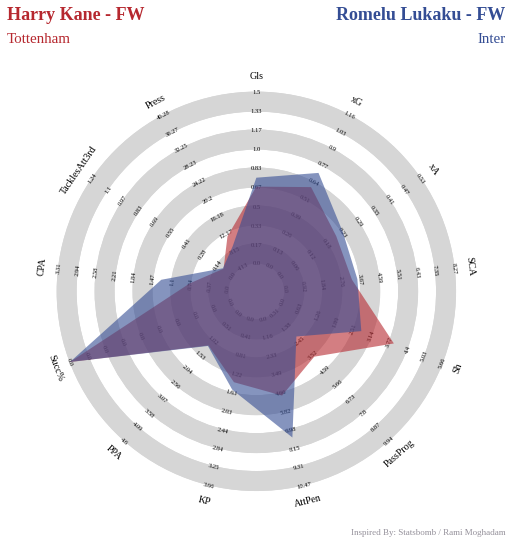

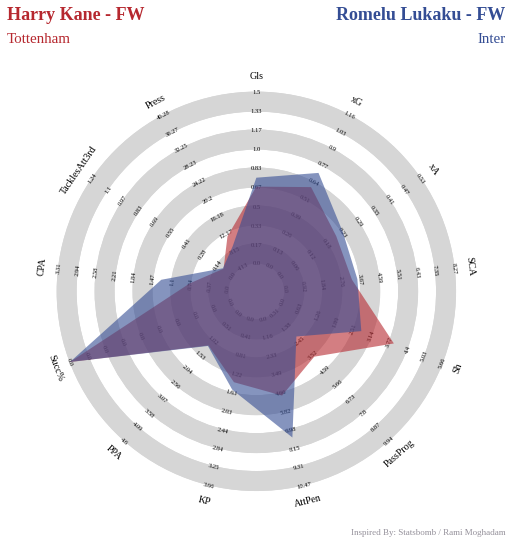

In [59]:
compare_players(df, 'Harry Kane', 'Romelu Lukaku')

In [55]:
df[df['Name'] == 'Harry Kane']['Pos'].values[0][0]

'FW'

In [54]:
positions_set = ast.literal_eval(df2[df2['Name'] == 'Harry Kane']['Pos'].values[0])
position = list(positions_set)[0]
position

'FW'